# ÂÆâË£ùÂ•ó‰ª∂ÂíåÂåØÂÖ•Â∫´


In [ ]:
# ÂÆâË£ùÂøÖË¶ÅÁöÑÂ•ó‰ª∂
!pip install -U langchain-community
!pip install google-search-results
!pip install playwright nest_asyncio
!playwright install
# ÂåØÂÖ•ÂøÖË¶ÅÁöÑÂ∫´
import asyncio
import csv
import os
import re

import nest_asyncio
import pandas as pd
import requests
from IPython.display import display  # Â¶ÇÊûúÈúÄË¶Å‰ΩøÁî® displayÔºåÂâá‰øùÁïô
from langchain.utilities import SerpAPIWrapper
from playwright.async_api import async_playwright
from tqdm.asyncio import tqdm  # Â¶ÇÊûúÊú™‰ΩøÁî® tqdmÔºåÂâáÁßªÈô§


# ÊáâÁî® nest_asyncio
nest_asyncio.apply()


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.5/2.5 MB 46.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.9/50.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32010 sha256=5874c1664e68d9a2170b57f676059bd74ac60c18bcf879bd0c1c8b3c9d716083
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45.1/45.1 MB 18.7 MB/s eta 0:00:00

In [ ]:
# Ë®≠ÂÆö SerpAPI Ëàá HTTP headersÔºàÂ°´ÂÖ•‰Ω†ÁöÑ CookieÔºâ
os.environ["SERPAPI_API_KEY"] = ""
search = SerpAPIWrapper(params={"hl": "zh-tw", "gl": "tw"})

headers = {
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0",
    "Cookie": "",  # Ë¶ÅÂ∏∂‰Ω†ÁöÑÂÆåÊï¥ cookie
    "Origin": "https://www.strava.com",
    "Referer": "https://www.strava.com/",
}

COOKIES = [
]

# ÂÆöÁæ©Â∑•ÂÖ∑ÂáΩÊï∏

In [ ]:
def calculate_difficulty(distance, avg_grade, elev_high, elev_low):
    return (distance / 1000) * (avg_grade)**2*200 + ((elev_high - elev_low) / 10)

def get_segment_id_from_name(name: str):
    print(f"üîç Ê≠£Âú®ÊêúÂ∞ãÔºö„Äå{name} segment site:veloviewer.com OR site:strava.com„Äç")
    results = search.results(f"{name} segment site:veloviewer.com OR site:strava.com")
    for result in results.get("organic_results", []):
        link = result.get("link", "")
        match = re.search(r"https?://(?:www\.)?(?:veloviewer|strava)\.com/segments/(\d+)", link)
        if match:
            segment_id = int(match.group(1))
            print(f"‚úîÔ∏è ÊâæÂà∞ Segment IDÔºö{segment_id}Ôºà‰æÜËá™ {link}Ôºâ")
            return segment_id
    print("‚ùå ÁÑ°Ê≥ïÂæûÊêúÂ∞ãÁµêÊûú‰∏≠Êì∑Âèñ Segment ID„ÄÇ")
    print("üìÑ ÂèñÂæóÁöÑÈÄ£ÁµêÂàóË°®Ôºö")
    for result in results.get("organic_results", []):
        print(result.get("link", ""))
    raise ValueError("Ë´ãÁ¢∫Ë™çÈóúÈçµÂ≠óÊòØÂê¶Ê≠£Á¢∫ÔºåÊàñ Segment ÊòØÂê¶Â≠òÂú®Êñº strava.com / veloviewer.com")

def query_segment(segmentID):
    url = "https://graphql.strava.com/"
    payload = {
        "query": """
        query Segments($segmentIds: [Identifier!]!) {
          segments(segmentIds: $segmentIds) {
            metadata { name }
            measurements { distance avgGrade elevHigh elevLow }
          }
        }
        """,
        "variables": { "segmentIds": [segmentID] },
        "operationName": "Segments"
    }
    response = requests.post(url, json=payload, headers=headers)
    data = response.json()
    segments = data.get("data", {}).get("segments", [])
    if not segments:
        raise ValueError(f"‚ùå Strava Êü•ÁÑ° Segment IDÔºö{segmentID}ÔºåÂèØËÉΩÁÇ∫ÁßÅ‰∫∫ÊÆµÊàñÁÑ°Ê≥ïÂÖ¨ÈñãÊü•Ë©¢„ÄÇ")
    seg = segments[0]
    m = seg["measurements"]
    difficulty = calculate_difficulty(m["distance"], m["avgGrade"], m["elevHigh"], m["elevLow"])
    return {
        "Name": seg["metadata"]["name"],
        "Distance (m)": f"{m['distance']:.1f}",
        "Avg Grade (%)": f"{m['avgGrade']:.8f}",
        "Elev High (m)": f"{m['elevHigh']:.1f}",
        "Elev Low (m)": f"{m['elevLow']:.1f}",
        "difficult": f"{difficulty:.1f}"
    }



# Strava Ë∑ØÊÆµÊéíË°åÊ¶ú

In [ ]:
import re
import random
import asyncio
import uuid
import time
import hashlib
from urllib.parse import urljoin
from playwright.async_api import Page

def parse_weight_range(text):
    text = text.strip()
    if match := re.match(r"(\d+)\s*kg\s+and\s+under", text, re.IGNORECASE):
        return (int(match.group(1)) - 10, int(match.group(1)))
    if match := re.match(r"(\d+)\s*kg\s+and\s+over", text, re.IGNORECASE):
        return (int(match.group(1)), int(match.group(1)) + 10)
    if match := re.match(r"(\d+)\s*to\s*(\d+)\s*kg", text, re.IGNORECASE):
        return (int(match.group(1)), int(match.group(2)))
    return None
async def extract_leaderboard_data(page: Page, filter_data: dict):
    rows = await page.locator("table.table-leaderboard tbody tr, table.leaderboard tbody tr").all()
    results = []
    min_w, max_w = filter_data["range"]
    median_weight = (min_w + (max_w if max_w is not None else min_w + 10)) / 2

    for row in rows:
        try:
            rank_cell = row.locator("td.text-center").first
            rank = await rank_cell.inner_text()
            if not rank.strip().isdigit():
                avatar = rank_cell.locator("div.avatar-athlete")
                rank = await avatar.get_attribute("title") or ""

            name_el = row.locator("td.athlete a").first
            name = await name_el.inner_text() if name_el else ""

            date_el = row.locator("td.track-click a").nth(1)
            date = await date_el.inner_text() if date_el else ""
            activity_href = await date_el.get_attribute("href") if date_el else ""
            activity_url = urljoin("https://www.strava.com", activity_href) if activity_href else ""

            # Áç≤ÂèñÊâÄÊúâÊ¨Ñ‰Ωç‰∏¶Ë≠òÂà•ÊôÇÈñìÊ¨Ñ‰Ωç
            cells = await row.locator("td").all()
            cell_texts = [await cell.inner_text() for cell in cells]

            # Ê®ôÊ∫ñÊ¨Ñ‰Ωç‰ΩçÁΩÆ
            speed = cell_texts[3].strip() if len(cell_texts) > 3 else ""
            hr = cell_texts[4].strip() if len(cell_texts) > 4 else ""
            power = cell_texts[5].strip() if len(cell_texts) > 5 else ""

            # Êô∫ËÉΩË≠òÂà•ÊôÇÈñìÊ¨Ñ‰Ωç - Â∞ãÊâæÁ¨¶ÂêàÊôÇÈñìÊ†ºÂºèÁöÑÊ¨Ñ‰Ωç(Â¶Ç mm:ss Êàñ h:mm:ss)
            time_str = ""
            for text in cell_texts[6:]:  # ÂæûÁ¨¨6ÂÄãÊ¨Ñ‰ΩçÈñãÂßãÊ™¢Êü•
                text = text.strip()
                if re.match(r'^(\d{1,2}:)?\d{1,2}:\d{2}$', text):  # ÂåπÈÖçÊôÇÈñìÊ†ºÂºè
                    time_str = text
                    break
                elif "VAM" in text:  # Ë∑≥ÈÅéVAMÊ¨Ñ‰Ωç
                    continue

            w_per_kg = None
            if power and power != "-" and (m := re.search(r'\d+', power)):
                try:
                    power_value = float(m.group(0))
                    w_per_kg = round(power_value / median_weight, 2)
                except:
                    pass

            results.append({
                "rank": str(rank).strip(),
                "name": name.strip(),
                "weight_group": filter_data["text"],
                "estimated_weight_kg": median_weight,
                "time": time_str,
                "date": date.strip(),
                "activity_url": activity_url,
                "speed": speed,
                "avg_power": power,
                "avg_hr": hr,
                "w_per_kg": w_per_kg
            })

        except Exception as e:
            print(f"\u26a0\ufe0f Ëß£ÊûêË≥áÊñôÊôÇÁôºÁîüÈåØË™§: {e}")
            continue

    return results

async def get_leaderboard_content_hash(page):
    content = await page.inner_html('#segment-leaderboard')
    return hashlib.md5(content.encode()).hexdigest()

async def wait_for_leaderboard_update(page: Page, old_hash: str, timeout=5000):
    print("‚è≥ Á≠âÂæÖ leaderboard HTML Êõ¥Êñ∞...")
    start = time.time()
    while time.time() - start < timeout / 1000:
        new_hash = await get_leaderboard_content_hash(page)
        if new_hash != old_hash:
            print("‚úÖ Leaderboard Â∑≤Êõ¥Êñ∞")
            return
        await asyncio.sleep(0.5)
    raise TimeoutError("‚ùå Leaderboard Ë≥áÊñôÊú™Êõ¥Êñ∞")

async def click_see_all_weight_filter(page: Page):
    see_all_buttons = page.locator('button.see-all')
    for i in range(await see_all_buttons.count()):
        btn = see_all_buttons.nth(i)
        target = await btn.get_attribute("data-target")
        if target == ".weight-filter" and await btn.is_visible():
            print("üîò ÈªûÊìä 'See All'Ôºàweight-filterÔºâ...")
            await btn.scroll_into_view_if_needed()
            await btn.click()
            await asyncio.sleep(1)
            return


async def scrape_weight_filtered_leaderboards(context, segment_id: str):
    url = f"https://www.strava.com/segments/{segment_id}"
    page = await context.new_page()
    weight_data = []
    unique_entries = set()
    success_count = 0

    try:
        await asyncio.sleep(random.uniform(1, 3))
        await page.goto(url, wait_until="networkidle")
        print("‚è≥ Â∞ãÊâæÈ´îÈáçÂàÜÁ¥öÈÅéÊøæÂô®...")

        await click_see_all_weight_filter(page)

        links = page.locator('ul.filters li ul li a[data-filter="weight_class"]')
        await links.first.wait_for(state="attached", timeout=15000)

        weight_filter_data = []
        for i in range(await links.count()):
            try:
                text = await links.nth(i).inner_text()
                weight_range = parse_weight_range(text)
                if weight_range:
                    weight_filter_data.append({
                        "text": text,
                        "range": weight_range,
                        "index": i
                    })
            except Exception as e:
                print(f"‚ö†Ô∏è ÂøΩÁï•Á¨¨ {i} È†ÖÔºàËÆÄÂèñÈåØË™§: {e}Ôºâ")

        print(f"‚úÖ Á∏ΩÂÖ±ÊâæÂà∞ {len(weight_filter_data)} ÁµÑÈ´îÈáçÂàÜÁ¥ö")

        for item in weight_filter_data:
            print(f"\n‚ñ∂Ô∏è ÁØ©ÈÅ∏: {item['text']} ({item['range']}kg)")
            try:
                await click_see_all_weight_filter(page)

                filter_links = page.locator('ul.filters li ul li a[data-filter="weight_class"]')
                link = filter_links.nth(item["index"])

                print(f"üîç ÂòóË©¶ scrollIntoView: {item['text']}")
                try:
                    await page.evaluate('(el) => el.scrollIntoView({behavior: "smooth", block: "center"})', await link.element_handle())
                except Exception as eval_err:
                    print(f"‚ö†Ô∏è JS scrollIntoView Â§±Êïó: {str(eval_err)}")

                await link.wait_for(state="visible", timeout=5000)
                old_hash = await get_leaderboard_content_hash(page)
                print("üñ±Ô∏è ÈªûÊìäÈÅ∏È†Ö‰∏≠...")
                await link.click()
                await wait_for_leaderboard_update(page, old_hash)
                await asyncio.sleep(2)
                print("üì• ÂæûÂ§öÈ†Å leaderboard Êì∑ÂèñË≥áÊñô...")
                current_data = await load_all_leaderboard_pages(
                    page,
                    {
                        "text": item["text"],
                        "range": item["range"]
                    },
                    max_pages=8,
                    max_rows=200
                )


                count_added = 0
                for row in current_data:
                    key = f"{row['rank']}-{row['name']}-{row['date']}"
                    if key not in unique_entries:
                        unique_entries.add(key)
                        weight_data.append(row)
                        count_added += 1

                print(f"‚úÖ {item['text']}ÔºöÊàêÂäüÊäìÂèñ {count_added} Á≠ÜË≥áÊñô")
                success_count += 1

            except Exception as e:
                screenshot_path = f"/content/{uuid.uuid4()}.png"
                await page.screenshot(path=screenshot_path)
                print(f"‚ùå ÁØ©ÈÅ∏ {item['text']} ÁôºÁîüÈåØË™§: {str(e)}ÔºàÂ∑≤Êà™Âúñ: {screenshot_path}Ôºâ")

        print(f"\nüìä ÂÆåÊàêÔºöÁ∏ΩÁØ©ÈÅ∏ÁµÑÊï∏ {len(weight_filter_data)}ÔºåÊàêÂäü {success_count} ÁµÑÔºåÁ∏ΩÂÖ± {len(weight_data)} Á≠ÜË≥áÊñô")
        return weight_data

    except Exception as e:
        print(f"‚ö†Ô∏è ‰∏ªÊµÅÁ®ãÈåØË™§: {e}")
        return []

    finally:
        await page.close()

In [ ]:
async def load_all_leaderboard_pages(page: Page, filter_data: dict, max_pages: int = 8, max_rows: int = 200):
    results = []
    current_page = 1
    unique_entries = set()

    while current_page <= max_pages:
        await page.wait_for_selector("table.table-leaderboard tbody tr, table.leaderboard tbody tr", timeout=10000)
        print(f"üìÑ Á¨¨ {current_page} È†ÅÔºåÊì∑ÂèñË≥áÊñô...")

        current_data = await extract_leaderboard_data(page, filter_data)

        count_added = 0
        for row in current_data:
            key = f"{row['rank']}-{row['name']}-{row['date']}"
            if key not in unique_entries:
                unique_entries.add(key)
                results.append(row)
                count_added += 1

        print(f"‚úÖ Á¨¨ {current_page} È†ÅÊñ∞Â¢û {count_added} Á≠ÜÔºàÁ¥ØË®à {len(results)} Á≠ÜÔºâ")

        if len(results) >= max_rows:
            print("üõë Â∑≤ÈÅîÊúÄÂ§ßË≥áÊñôÁ≠ÜÊï∏")
            break

        next_btn = page.locator("li.next_page a")
        if await next_btn.is_visible():
            print("‚û°Ô∏è ÁøªÂà∞‰∏ã‰∏ÄÈ†Å")
            await next_btn.scroll_into_view_if_needed()
            await next_btn.click()
            await page.wait_for_timeout(2000)
            current_page += 1
        else:
            print("‚úÖ ÁÑ°‰∏ã‰∏ÄÈ†Å")
            break

    return results


# Âü∑Ë°å‰∏ªÊµÅÁ®ã

In [ ]:

async def run(segment_id):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        await context.add_cookies([{  # Cookie Ê†ºÂºèËΩâÊèõ
            "name": k.strip(), "value": v.strip(), "domain": ".strava.com", "path": "/"
        } for k, v in [c.split("=", 1) for c in headers["Cookie"].split(";")]])

        print("üîç ÊäìÂèñÈ´îÈáçÂàÜÁ¥öÊéíË°åÊ¶ú‰∏≠...")
        data = await scrape_weight_filtered_leaderboards(context, segment_id)

        df = pd.DataFrame(data)
        filename = f"segment_{segment_id}_leaderboard.csv"
        df.to_csv(filename, index=False, encoding="utf-8-sig")
        print(f"\n‚úÖ ÂÆåÊàêÔºÅÂ∑≤ÂÑ≤Â≠òËá≥ {filename}")
        await browser.close()


# ‰∏ª‰∫íÂãïÂºèËº∏ÂÖ•ÈÇèËºØ

In [ ]:

records = []
while True:
    name = input("Ë´ãËº∏ÂÖ•Ë∑ØÊÆµÂêçÁ®±ÔºàÊàñËº∏ÂÖ• 0 ÁµêÊùüÔºâ: ")
    if name == "0":
        df = pd.DataFrame(records)
        df.to_csv("segment_data.csv", index=False, encoding="utf-8-sig")
        print("‚úÖ Â∑≤ÂåØÂá∫ segment_data.csv")
        break
    try:
        segment_id = get_segment_id_from_name(name)
        info = query_segment(segment_id)
        records.append(info)
        print(f"‚úÖ ÊàêÂäüÊü•Ë©¢Ôºö{info['Name']}")

        # È°çÂ§ñÊäìÊéíË°åÊ¶úË≥áÊñô
        asyncio.run(run(segment_id))

    except Exception as e:
        print("‚ùå ÈåØË™§Ôºö", e)


Ë´ãËº∏ÂÖ•Ë∑ØÊÆµÂêçÁ®±ÔºàÊàñËº∏ÂÖ• 0 ÁµêÊùüÔºâ: Ê∑∑ÂÖÉÂÆÆÂà∞ÊòéÂæ∑ÂÆÆ
üîç Ê≠£Âú®ÊêúÂ∞ãÔºö„ÄåÊ∑∑ÂÖÉÂÆÆÂà∞ÊòéÂæ∑ÂÆÆ segment site:veloviewer.com OR site:strava.com„Äç
‚úîÔ∏è ÊâæÂà∞ Segment IDÔºö3907879Ôºà‰æÜËá™ https://veloviewer.com/segments/3907879Ôºâ
‚úÖ ÊàêÂäüÊü•Ë©¢ÔºöÊ∑∑ÂÖÉÂÆÆÂà∞ÊòéÂæ∑ÂÆÆ
üîç ÊäìÂèñÈ´îÈáçÂàÜÁ¥öÊéíË°åÊ¶ú‰∏≠...
‚è≥ Â∞ãÊâæÈ´îÈáçÂàÜÁ¥öÈÅéÊøæÂô®...
üîò ÈªûÊìä 'See All'Ôºàweight-filterÔºâ...
‚úÖ Á∏ΩÂÖ±ÊâæÂà∞ 6 ÁµÑÈ´îÈáçÂàÜÁ¥ö

‚ñ∂Ô∏è ÁØ©ÈÅ∏: 54 kg and under ((44, 54)kg)
üîò ÈªûÊìä 'See All'Ôºàweight-filterÔºâ...
üîç ÂòóË©¶ scrollIntoView: 54 kg and under
‚ùå ÁØ©ÈÅ∏ 54 kg and under ÁôºÁîüÈåØË™§: Locator.wait_for: Timeout 5000ms exceeded.
Call log:
  - waiting for locator("ul.filters li ul li a[data-filter=\"weight_class\"]").first to be visible
    15 √ó locator resolved to hidden <a data-type="html" data-value="0_54" data-remote="true" class=" filter-link" data-filter="weight_class" href="/segments/3907879/leaderboard?filter=weight_class&weight_class=0_54">54 kg and un

# Ë≥áÊñôÂàÜÊûêÂíåË¶ñË¶∫Âåñ

# ËºâÂÖ•Ë≥áÊñôËàáÊ∏ÖÊ¥ó

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# ËÆÄÂèñ CSV Ê™îÊ°à
csv_file = "segment_" + str(segment_id) + "_leaderboard.csv"
df = pd.read_csv(csv_file)

# ËôïÁêÜ 'time' Ê¨Ñ‰ΩçÊàêÁÇ∫ time_secÔºàÁßíÔºâ
if not np.issubdtype(df['time'].dtype, np.number):
    df['time'] = pd.to_datetime(df['time'], format='%M:%S', errors='coerce')
    df = df.dropna(subset=['time'])
    df['time_sec'] = df['time'].dt.minute * 60 + df['time'].dt.second
else:
    df['time_sec'] = df['time']

# ÁØ©ÈÅ∏ avg_power Âê´ "Power Meter" ÁöÑË≥áÊñô
df = df[df['avg_power'].astype(str).str.contains("Power Meter", na=False)]

# Ëß£Êûê avg_power Êï∏ÂÄºÈÉ®ÂàÜÔºà‰æãÂ¶ÇÂæû "354 W Power Meter" ÊèêÂèñ 354Ôºâ
df['avg_power_w'] = df['avg_power'].str.extract(r'(\d+)\s*W').astype(float)

# Ë®àÁÆó w_per_kg = avg_power / estimated_weight_kg
df['w_per_kg'] = df['avg_power_w'] / df['estimated_weight_kg']

# ÁßªÈô§ÁÑ°ÊïàË≥áÊñô
df = df.dropna(subset=['w_per_kg', 'time_sec'])

df.head()


rank           name weight_group  estimated_weight_kg  \
0  Centrone ivan  Centrone ivan  55 to 64 kg                 59.5   
3              4  Jaka Primo≈æiƒç  55 to 64 kg                 59.5   
5              5  Robbie Hucker  55 to 64 kg                 59.5   
7              8        Kai Jay  55 to 64 kg                 59.5   
8              9           Á∂≠Â∫∏ Êõæ  55 to 64 kg                 59.5   

                 time          date  \
0 1900-01-01 00:02:30   Mar 9, 2024   
3 1900-01-01 00:02:47  Mar 15, 2025   
5 1900-01-01 00:02:49  Mar 10, 2018   
7 1900-01-01 00:02:51  May 14, 2023   
8 1900-01-01 00:02:52  Jul 31, 2024   

                                        activity_url      speed  \
0  https://www.strava.com/segment_efforts/3201413...  23.3 km/h   
3  https://www.strava.com/segment_efforts/3335931...  21.0 km/h   
5  https://www.strava.com/segment_efforts/3593476...  20.7 km/h   
7  https://www.strava.com/segment_efforts/3092663...  20.5 km/h   
8  https://www.strava.com/segment_efforts/3253519...  20.3 km/h   

           avg_power   avg_hr  w_per_kg  time_sec  avg_power_w  
0  449 W Power Meter  160 bpm  7.546218       150        449.0  
3  389 W Power Meter  174 bpm  6.537815       167        389.0  
5  356 W Power Meter  175 bpm  5.983193       169        356.0  
7  322 W Power Meter        -  5.411765       171        322.0  
8  344 W Power Meter  114 bpm  5.781513       172        344.0

# üìä 3. ÁßªÈô§Èõ¢Áæ§ÂÄºÔºàIQR Ê≥ïÔºâ

In [ ]:
IQR_multiplier = 2.0  # ÊîπÁÇ∫ 2.0 ÊàñÊõ¥È´ò‰ª•Ê∏õÂ∞ëÂà™Èô§Á≠ÜÊï∏

# w/kg
Q1, Q3 = df['w_per_kg'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['w_per_kg'] >= Q1 - IQR_multiplier * IQR) & (df['w_per_kg'] <= Q3 + IQR_multiplier * IQR)]

# time_sec
Q1_time, Q3_time = df['time_sec'].quantile([0.25, 0.75])
IQR_time = Q3_time - Q1_time
df = df[(df['time_sec'] >= Q1_time - IQR_multiplier * IQR_time) & (df['time_sec'] <= Q3_time + IQR_multiplier * IQR_time)]


df = df.sort_values(by='time_sec')
df.describe()


estimated_weight_kg                           time   w_per_kg  \
count            96.000000                             96  96.000000   
mean             71.270833  1900-01-01 00:03:10.302083072   4.674010   
min              59.500000            1900-01-01 00:02:35   2.374101   
25%              59.500000            1900-01-01 00:02:59   4.150838   
50%              69.500000     1900-01-01 00:03:10.500000   4.689862   
75%              79.500000            1900-01-01 00:03:18   5.190647   
max              89.500000            1900-01-01 00:03:51   6.537815   
std              10.462443                            NaN   0.818863   

         time_sec  avg_power_w  speed_kmh  avg_hr_bpm  efficiency_kmh_per_w  \
count   96.000000    96.000000  96.000000   57.000000             96.000000   
mean   190.302083   328.739583  18.505208  169.350877              0.057906   
min    155.000000   165.000000  15.100000  114.000000              0.039083   
25%    179.000000   305.750000  17.700000  165.000000              0.050453   
50%    190.500000   329.000000  18.350000  169.000000              0.056251   
75%    198.000000   356.500000  19.600000  177.000000              0.060537   
max    231.000000   461.000000  22.600000  198.000000              0.115152   
std     15.379494    53.129285   1.508179   13.549501              0.011933   

       power_per_bpm  
count      57.000000  
mean        1.967877  
min         1.078431  
25%         1.734463  
50%         1.970588  
75%         2.181287  
max         3.017544  
std         0.363000

# üìà 4. W/kg vs ÊôÇÈñìÔºàÂê´Á∑öÊÄßÂõûÊ≠∏Ë∂®Âã¢Á∑öÔºâ

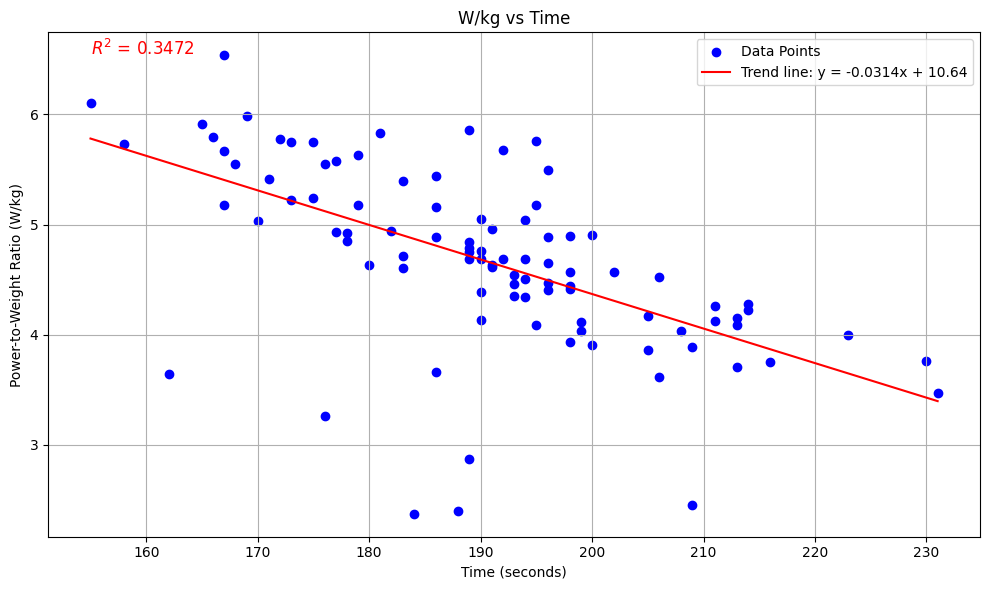

In [ ]:
import matplotlib.pyplot as plt

# ÂõûÊ≠∏ËÆäÊï∏
x = df['time_sec'].values
y = df['w_per_kg'].values
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b

# R^2
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Áπ™Âúñ
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label=f'Trend line: y = {a:.4f}x + {b:.2f}')
plt.text(min(x), max(y), f'$R^2$ = {r_squared:.4f}', fontsize=12, color='red')
plt.title('W/kg vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Power-to-Weight Ratio (W/kg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# üìä 5. È´îÈáçÁµÑÂà•Áµ±Ë®àÊëòË¶ÅÔºàÂπ≥ÂùáÂÄºÊØîËºÉÔºâ

In [ ]:
group_stats = df.groupby("weight_group")[["time_sec", "avg_power_w", "w_per_kg"]].mean().round(2)
group_stats


time_sec  avg_power_w  w_per_kg
weight_group                                 
55 to 64 kg     185.61       307.24      5.16
65 to 74 kg     180.88       329.92      4.75
75 to 84 kg     197.15       340.77      4.29
85 to 94 kg     208.00       359.33      4.01

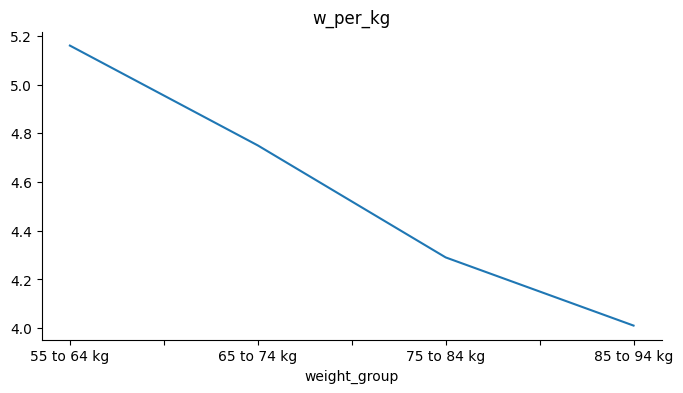

In [ ]:
# @title w_per_kg

from matplotlib import pyplot as plt
group_stats['w_per_kg'].plot(kind='line', figsize=(8, 4), title='w_per_kg')
plt.gca().spines[['top', 'right']].set_visible(False)

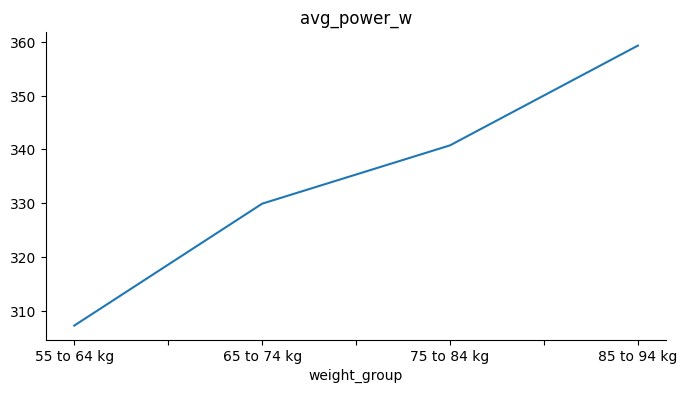

In [ ]:
# @title avg_power_w

from matplotlib import pyplot as plt
group_stats['avg_power_w'].plot(kind='line', figsize=(8, 4), title='avg_power_w')
plt.gca().spines[['top', 'right']].set_visible(False)

# üìâ 6. ÂäüÁéáËàáÊôÇÈñìÈóú‰øÇÂúñÔºàAverage Power vs TimeÔºâ

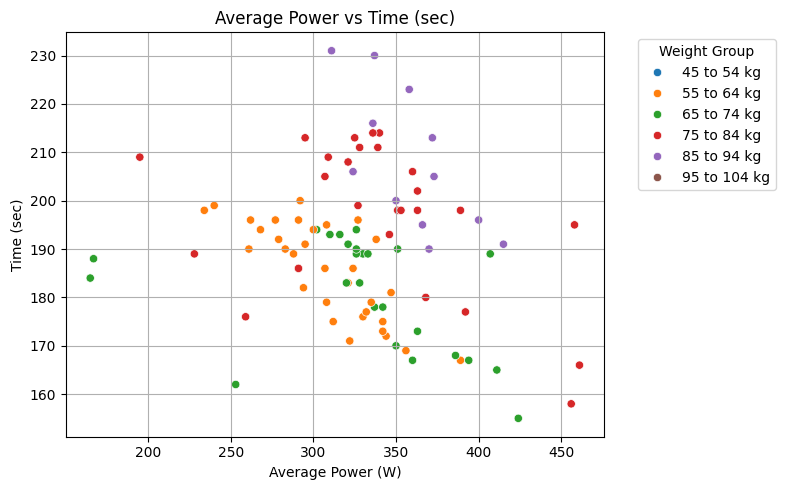

In [ ]:
hue_order = ['45 to 54 kg', '55 to 64 kg', '65 to 74 kg', '75 to 84 kg', '85 to 94 kg', '95 to 104 kg']


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='avg_power_w', y='time_sec', hue='weight_group', hue_order=hue_order)
plt.title("Average Power vs Time (sec)")
plt.xlabel("Average Power (W)")
plt.ylabel("Time (sec)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Weight Group')
plt.tight_layout()
plt.show()


# üåÄ 7. ÂäüÁéáÊïàÁéáÔºàkm/h per wattÔºâ& ÂøÉÁéáÊïàÁéá

In [ ]:
# Ëã• speed Ëàá avg_hr Ê¨Ñ‰ΩçÂ≠òÂú®ÂèØÁî®Ê†ºÂºè
df['speed_kmh'] = df['speed'].str.replace(" km/h", "", regex=False).astype(float)
df['avg_hr_bpm'] = df['avg_hr'].str.extract(r'(\d+)').astype(float)

# Ë®àÁÆóÊïàÁéá
df['efficiency_kmh_per_w'] = df['speed_kmh'] / df['avg_power_w']
df['power_per_bpm'] = df['avg_power_w'] / df['avg_hr_bpm']

# ÊèèËø∞Áµ±Ë®à
df[["efficiency_kmh_per_w", "power_per_bpm"]].describe()


NameError: name 'df' is not defined

# Ë®ìÁ∑¥AI model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from datetime import datetime

segment_id = 3907879
# ËÆÄÂèñ CSV Ê™îÊ°à
csv_file = "segment_" + str(segment_id) + "_leaderboard.csv"
df = pd.read_csv(csv_file)

# ÂÅáË®≠ÊôÇÈñìÊ¨Ñ‰ΩçÊòØ 'time'ÔºåÊ†ºÂºè‰æãÂ¶Ç '9:38'ÔºàÂàÜ:ÁßíÔºâ
def time_to_seconds(t):
    if pd.isna(t) or not isinstance(t, str):
        return np.nan
    parts = t.strip().split(':')
    if len(parts) == 3 and parts[2] == '00':  # ËôïÁêÜ MM:SS:00 Ê†ºÂºè
        try:
            m, s = int(parts[0]), int(parts[1])
            return m * 60 + s
        except ValueError:
            return np.nan
    elif len(parts) == 2:
        try:
            m, s = int(parts[0]), int(parts[1])
            return m * 60 + s
        except ValueError:
            return np.nan
    return np.nan

# ËΩâÊèõÊôÇÈñìÊ¨Ñ‰Ωç
df['time_sec'] = df['time'].apply(time_to_seconds)

# Âà™Èô§ time_sec Ê¨Ñ‰ΩçÁÇ∫ NaN ÁöÑÂàó
df = df.dropna(subset=['time_sec']).reset_index(drop=True)


# Ë£úÈΩäÁº∫Â§±ÂÄºÔºàËàâ‰æãÂπ≥ÂùáË£úÈΩäÔºå‰æùÈúÄÊ±ÇË™øÊï¥Ôºâ
df['avg_power_w'] = df['avg_power'].str.extract(r'(\d+)').astype(float)  # ÂèñÊï∏Â≠óÈÉ®ÂàÜËΩâfloat
df['avg_power_w'].fillna(df['avg_power_w'].mean(), inplace=True)
df['w_per_kg'].fillna(df['w_per_kg'].mean(), inplace=True)
df['speed'] = df['speed'].str.replace(' km/h', '').astype(float)

# ÂÅáË®≠‰Ω†ÁöÑ dataframe ÊòØ dfÔºådate Ê¨ÑÊòØÈ°û‰ºº "Apr 15, 2020"
# 1. ÂÖàËΩâ datetime
df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y', errors='coerce')

# 2. ÂÆöÁæ©Â≠£ÁØÄÂáΩÂºè
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


# ÂâçÈù¢Êó•ÊúüËàáÂ≠£ÁØÄÊ¨Ñ‰ΩçËôïÁêÜ
df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y', errors='coerce')
df['season'] = df['date'].dt.month.apply(get_season)
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_dummies], axis=1)

segment_info = {
    'segment_distance_m': 4114.6,
    'segment_avg_grade': 6.45,
    'segment_difficulty': 34315
}
for k, v in segment_info.items():
    df[k] = v


# ÁØ©ÈÅ∏ÈúÄË¶ÅÊ¨Ñ‰ΩçÔºàÁ§∫‰æãÔºâ
features = [
    'estimated_weight_kg', 'avg_power_w', 'w_per_kg',
    'segment_distance_m', 'segment_avg_grade', 'segment_difficulty',
    'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter'
]
print("Ë≥áÊñô‰∏≠ features Ê¨Ñ‰ΩçÊòØÂê¶Â≠òÂú®Ôºö")
print(df[features].isnull().sum())  # Á¢∫Ë™çÁº∫Â§±ÂÄºÊòØÂê¶ÈÇÑÂú®
print("Ë≥áÊñô‰∏≠ time_sec Ê¨Ñ‰ΩçÊòØÂê¶Â≠òÂú®Ôºö")
print(df['time_sec'].isnull().sum())

X = df[features]
y = df['time_sec']


Ë≥áÊñô‰∏≠ features Ê¨Ñ‰ΩçÊòØÂê¶Â≠òÂú®Ôºö
estimated_weight_kg    0
avg_power_w            0
w_per_kg               0
segment_distance_m     0
segment_avg_grade      0
segment_difficulty     0
season_Fall            0
season_Spring          0
season_Summer          0
season_Winter          0
dtype: int64
Ë≥áÊñô‰∏≠ time_sec Ê¨Ñ‰ΩçÊòØÂê¶Â≠òÂú®Ôºö
0


<ipython-input-53-292091e30cae>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_power_w'].fillna(df['avg_power_w'].mean(), inplace=True)
<ipython-input-53-292091e30cae>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:


# -------- 2. ÂàáÂàÜË®ìÁ∑¥ÈõÜËàáÊ∏¨Ë©¶ÈõÜ --------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -------- 3. Á∑öÊÄßÂõûÊ≠∏Ê®°Âûã --------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ë©ï‰º∞ Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Performance:")
print(f"R¬≤: {r2_lr:.3f}, MAE: {mae_lr:.3f} sec, RMSE: {rmse_lr:.3f} sec\n")

# -------- 4. XGBoost Ê®°Âûã --------
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Ë©ï‰º∞ XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost Performance:")
print(f"R¬≤: {r2_xgb:.3f}, MAE: {mae_xgb:.3f} sec, RMSE: {rmse_xgb:.3f} sec\n")


Linear Regression Performance:
R¬≤: 0.747, MAE: 76.986 sec, RMSE: 134.921 sec

XGBoost Performance:
R¬≤: 0.709, MAE: 71.118 sec, RMSE: 144.787 sec



# ‰ΩøÁî®modelÊ®°Êì¨ÊôÇÈñì

In [ ]:
def simulate_ride(model, weight_kg, avg_power_w, w_per_kg,
                  distance_m, avg_grade, difficulty, season='Spring'):
    input_df = pd.DataFrame([{
        'estimated_weight_kg': weight_kg,
        'avg_power_w': avg_power_w,
        'w_per_kg': w_per_kg,
        'segment_distance_m': distance_m,
        'segment_avg_grade': avg_grade,
        'segment_difficulty': difficulty,
        'season_Fall': 1 if season == 'Fall' else 0,
        'season_Spring': 1 if season == 'Spring' else 0,
        'season_Summer': 1 if season == 'Summer' else 0,
        'season_Winter': 1 if season == 'Winter' else 0,
    }])
    pred_time_sec = model.predict(input_df)[0]
    return round(pred_time_sec, 1)


In [ ]:
simulate_ride(xgb_model,
              weight_kg=60,
              avg_power_w=300,
              w_per_kg=5.0,
              distance_m=3000,
              avg_grade=4.5,
              difficulty=5.2,
              season='Spring')


np.float32(814.1)

# ÂÑ≤Â≠òÊ®°Âûã

In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model_segment_'+str(segment_id)+'.pkl')


['xgb_model_segment_3907879.pkl']

 # ‰ΩøÁî® SHAP Ëß£Èáã XGBoost ÁâπÂæµË≤¢Áçª

In [ ]:
print(X_train.dtypes)



estimated_weight_kg    float64
avg_power_w            float64
w_per_kg               float64
segment_distance_m     float64
segment_avg_grade      float64
segment_difficulty       int64
season_Fall               bool
season_Spring             bool
season_Summer             bool
season_Winter             bool
dtype: object


In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


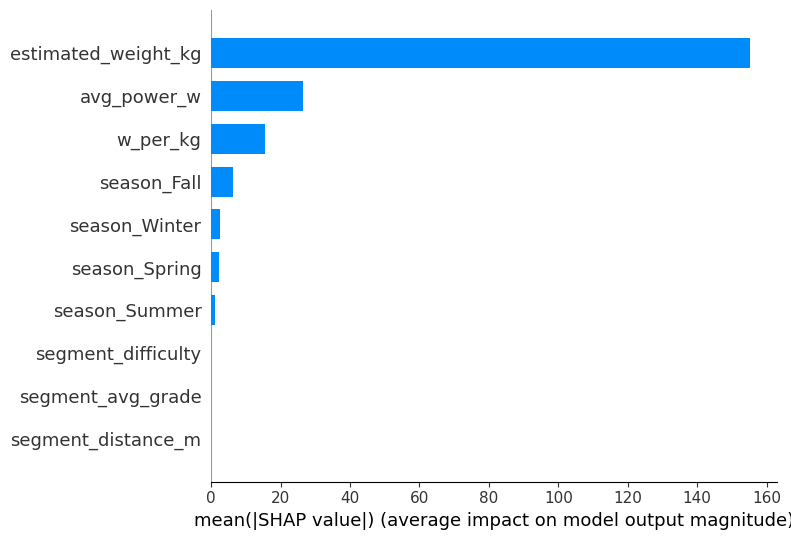

In [ ]:
import shap

# Âª∫Á´ã explainer
explainer = shap.Explainer(xgb_model, X_train)

# Ë®àÁÆó SHAP ÂÄº
shap_values = explainer(X_test)

# Ë¶ñË¶∫Âåñ
shap.summary_plot(shap_values, X_test, plot_type="bar")


# ÂèÉÊï∏Ë™øÊï¥Ëàá‰∫§ÂèâÈ©óË≠â

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'),
                    param_grid,
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    verbose=1)

grid.fit(X_train, y_train)

print("ÊúÄ‰Ω≥ÂèÉÊï∏Ôºö", grid.best_params_)
print("ÊúÄ‰Ω≥ MAEÔºö", -grid.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
ÊúÄ‰Ω≥ÂèÉÊï∏Ôºö {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
ÊúÄ‰Ω≥ MAEÔºö 60.64229153508175
